# HEART PREDICTION DISEASE

## DATASET COLUMNS FEATURE EXPLAIN

--->Age (In years)
--->Sex  1 - Male 0 - Female
--->CP (Chest Pain Type)  0 - Typical Angina (Heart related) 1 - Atypical Angina (Non-heart related) 2 - Non-Anginal pain       (Non-heart related) 3 - Asymptomatic (No disease)
--->RESTBPS (Resting Blood Pressure (in mm Hg on admission to the hospital))
--->CHOL (Serum Cholestoral in mg/dl) Healthy serum cholesterol is less than 200 mg/dL
--->FPS (Fasting blood sugar > 120 mg/dl) 1 - True 0 - False
--->RESTECH (Resting Electro Cardio Graphic results)
--->THALACH (Maximum heart rate achieved)
--->EXANG (Exercise induced Angina) 1 - Yes 0 - No
--->OLDPEAK (ST depression induced by exercise relative to rest)
--->SLOPE (Slope of the peak exercise ST segment)
--->CA (Number of major vessels (0-3) colored by Flouroscopy)
--->THAL 0 - Normal 1 - Fixed defect 2 - Reversible defect
--->TARGET 1 - Heart Problem 0 - No Heart Problem

The dataset is taken from kaggle.com

In [23]:
#import the libraries as required 
import pandas as pd
import numpy as np

Load the dataset

In [24]:
data=pd.read_csv('D:\datasets\heart_disease.csv')
#print the starting few datas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
#print ending few data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [27]:
#Check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
#changing the column names
data.columns=['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 
                    'MaxHeartRateAchivied','ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 
                    'Thalassemia', 'Target']

import all the necessary libraries.
Heatmap tells us the correlation between the different variables.


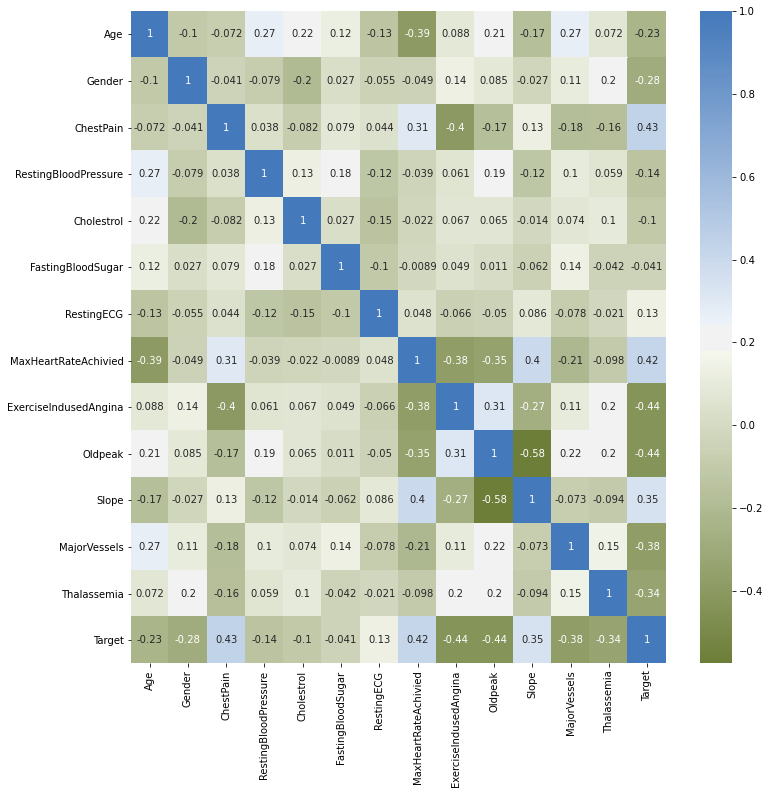

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
a=data.corr()
b=sb.heatmap(a,annot=True,cmap=sb.diverging_palette(100, 250, n=500))

In [30]:
data.nunique()

Age                       41
Gender                     2
ChestPain                  4
RestingBloodPressure      49
Cholestrol               152
FastingBloodSugar          2
RestingECG                 3
MaxHeartRateAchivied      91
ExerciseIndusedAngina      2
Oldpeak                   40
Slope                      3
MajorVessels               5
Thalassemia                4
Target                     2
dtype: int64

# The below bargraph tells us the percentage of the different chest pain 

<BarContainer object of 4 artists>

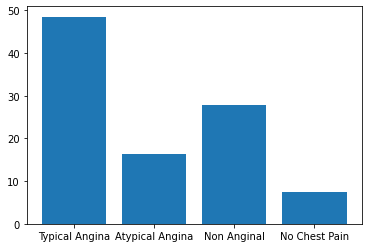

In [31]:
#different chest pain in data 
#ta_cp=TYPICAL ANGINA CHEST PAIN
#aa_cp=ATYPICAL ANGINA CHEST PAIN
#na_cp=NON ANGINAL CHEST PAIN
#no_cp=NO CHEST PAIN
ta_cp=[i for i in data['ChestPain']if i==0]
aa_cp=[i for i in data['ChestPain']if i==1]
na_cp=[i for i in data['ChestPain']if i==2]
no_cp=[i for i in data['ChestPain']if i==3]
ta_total=len(ta_cp)*100/len(data)
aa_total=len(aa_cp)*100/len(data)
na_total=len(na_cp)*100/len(data)
no_total=len(no_cp)*100/len(data)
labels=['Typical Angina','Atypical Angina','Non Anginal','No Chest Pain']
values=[ta_total,aa_total,na_total,no_total]
plt.bar(labels,values)


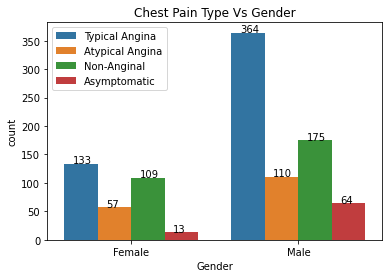

In [32]:
#chest pain in males and females
result=[]
for k in data['ChestPain']:
    if k == 0:
        result.append('Typical Angina')
    elif k == 1:
        result.append('Atypical Angina')
    elif k == 2:
        result.append('Non-Anginal')
    elif k == 3:
        result.append('Asymptomatic')

data['Chest Pain Type'] = result

ax = sb.countplot(hue=result,x='Gender',data=data)

plt.title("Chest Pain Type Vs Gender") 
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+1))

ax.set_xticklabels(['Female','Male']);

Heart Attacks in males and females is represented using the graph

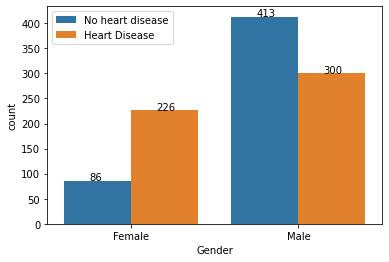

In [87]:
health=[]
for i in data['Target']:
    if i ==0:
        health.append('No heart disease')
    if i==1:
        health.append('Heart Disease')
ax=sb.countplot(x='Gender',data=data,hue=health)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
ax.set_xticklabels(['Female','Male']);

In [34]:
female=((data['Gender']== 0)&(data['Target']== 1)) .sum()
female_disease=(data['Target']== 1).sum()
print('percentage of females having the disease=:{:.2f}%'.format(female/female_disease * 100))
male=((data['Gender']== 1)&(data['Target']== 1)) .sum()
male_disease=(data['Target']== 1).sum()
print('percentage of males having the disease={:.2f}%'.format(male/male_disease * 100))


percentage of females having the disease=:42.97%
percentage of males having the disease=57.03%


In [35]:
#percentage of people having the disease of different age group is calculated
age_group=[]
for k in data['Age']:
    if (k >=29) & (k<40):
        age_group.append(0)
    elif (k >=40)&(k<55):
        age_group.append(1)
    else:
        age_group.append(2)
data['Age-Group']=age_group
young_age = ((data['Age-Group'] == 0) & (data['Target'] == 1)).sum()
young_disease =  (data['Target'] == 1) .sum()
print('Percent of Youth having heart disease   : {:.2f}%'.format(young_age/young_disease * 100))

middle_age = ((data['Age-Group'] == 1) & (data['Target'] == 1)).sum()
middle_disease =  (data['Target'] == 1).sum()
print('Percent of Mid-Age having heart disease : {:.2f}%'.format(middle_age/middle_disease * 100))

old_age = ((data['Age-Group'] == 2) & (data['Target'] == 1)).sum()
old_disease =  (data['Target'] == 1).sum()
print('Percent of Old-Age having heart disease : {:.2f}%'.format(old_age/old_disease * 100))

Percent of Youth having heart disease   : 7.98%
Percent of Mid-Age having heart disease : 52.47%
Percent of Old-Age having heart disease : 39.54%


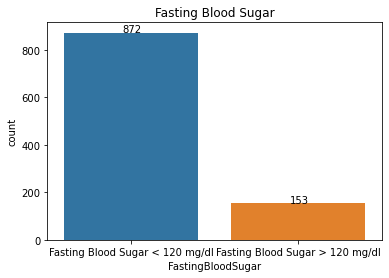

In [36]:
#people having the sugar above and below 120mg/dl is shown
ax = sb.countplot(x='FastingBloodSugar',data=data)
plt.title("Fasting Blood Sugar")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
ax.set_xticklabels(["Fasting Blood Sugar < 120 mg/dl",  "Fasting Blood Sugar > 120 mg/dl"]);

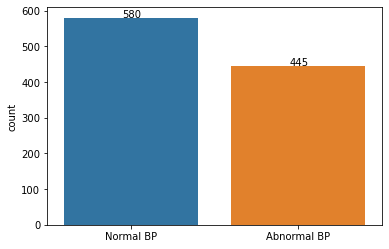

In [37]:
bp=[]
for k in data['RestingBloodPressure']:
    if (k > 130):
        bp.append(1) #high bp
    else:
        bp.append(0) #normal
ax = sb.countplot(x=bp)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
    
ax.set_xticklabels(["Normal BP","Abnormal BP"]);

Text(0.5, 1.0, 'Serum Cholestrol')

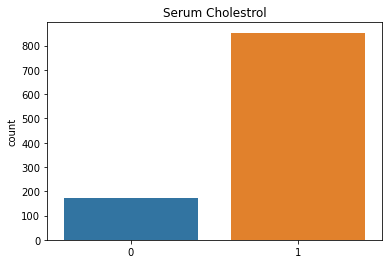

In [38]:
#people having serum cholestrol has 1 are said to have a non healthy heart,one with 0 are said to have a heathy heart

serum_chol=[]
for k in data['Cholestrol']:
    if k > 200:
        serum_chol.append(1) #not healthy
    else:
        serum_chol.append(0) #healthy

ax = sb.countplot(x=serum_chol)

plt.title("Serum Cholestrol")

# LOGISTIC REGRESSION

##Accuracy and confusion matrix is found using logistic regression 

In [79]:
#algorithm selection
#library:sklearn
#module:linear_model
#class:logistic regression
#algorithm selection
#library:sklearn
#module:linear_model
#class:logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_data = data.drop(columns=['Chest Pain Type','Age-Group','Target'],axis=1)
Y = data['Target']
x_train, x_test, y_train, y_test = train_test_split(X_data,Y,test_size = 0.2)
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_accuracy*100))
cm = confusion_matrix(y_test,lr_pred)
print('Confusion Matrix:')
print(cm)

Logistic Regression Accuracy: 83.41%
Confusion Matrix:
[[ 68  23]
 [ 11 103]]


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# RANDOM FOREST CLASSIFIER

In [80]:
#library:sklearn
#module:ensemble
#class:random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print('Random Forest Classifier Accuracy :{:.2f}%'.format(rfc_accuracy*100))
cm = confusion_matrix(y_test,rfc_pred)
print('Confusion Matrix')
print(cm)

Random Forest Classifier Accuracy :88.29%
Confusion Matrix
[[ 78  13]
 [ 11 103]]


# KNN CLASSIFIER

In [82]:
#library:sklearn
#module:neighbors
#class:KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors means k
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print('KNeighborsClassifier Accuracy: {:.2f}%'.format(knn_accuracy*100))
cm = confusion_matrix(y_test,knn_pred)
print(cm)

KNeighborsClassifier Accuracy: 74.63%
[[79 12]
 [40 74]]


# SUPPORT VECTOR MACHINE

In [83]:
#library:sklearn
#module:svm
#class:svc
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('SVM Accuracy: {:.2f}%'.format(svm_accuracy*100))
cm = confusion_matrix(y_test,svm_pred)
print(cm)

SVM Accuracy: 68.78%
[[63 28]
 [36 78]]


# NAIVE BAYES

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print('Naive Bayes Accuracy: {:.2f}%'.format(nb_accuracy*100))
cm = confusion_matrix(y_test,nb_pred)
print(cm)

Naive Bayes Accuracy: 80.98%
[[ 66  25]
 [ 14 100]]


The accuracy from different models along with the confusion matrix is calculated and represented in the form of bar graph.

# The accuracy obtained from Random Forest Classifier is the highest

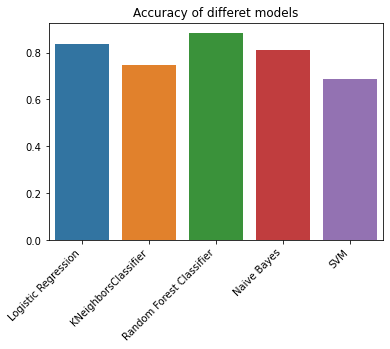

In [85]:
models = ['Logistic Regression','KNeighborsClassifier','Random Forest Classifier','Naive Bayes','SVM']
accuracy = [lr_accuracy,knn_accuracy,rfc_accuracy,nb_accuracy,svm_accuracy]
ax = sb.barplot(models,accuracy)
plt.title("Accuracy of differet models")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');